In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/Users/marinch/repos/inchiosa/open_deep_research/src


In [2]:
! pip install -U -q open-deep-research

In [3]:
import open_deep_research   
print(open_deep_research.__version__) 

0.0.14


In [4]:
from IPython.display import Image, display
from langgraph.types import Command
from langgraph.checkpoint.memory import MemorySaver
from open_deep_research.graph import builder

In [5]:
memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

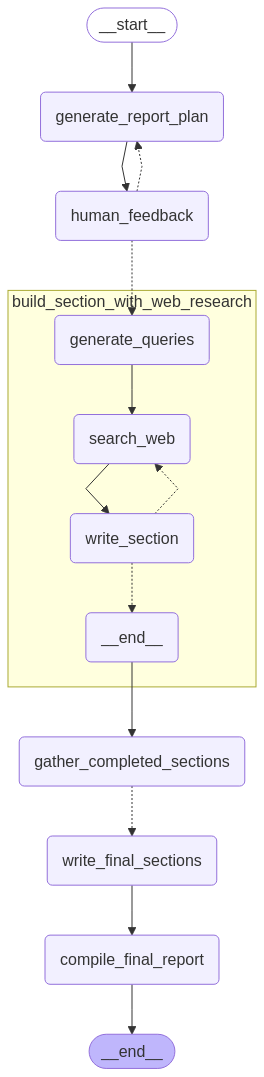

In [6]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [7]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

# Set the API keys used for any model or search tool selections below, such as:
_set_env("OPENAI_API_KEY")
_set_env("ANTHROPIC_API_KEY")
_set_env("TAVILY_API_KEY")
_set_env("GROQ_API_KEY")
_set_env("PERPLEXITY_API_KEY")
_set_env("AZURE_OPENAI_API_KEY")
_set_env("AZURE_OPENAI_ENDPOINT")
_set_env("OPENAI_API_VERSION")

In [8]:
import uuid 
from IPython.display import Markdown

REPORT_STRUCTURE = """Use this structure to create a report on the user-provided topic:

1. Introduction (no research needed)
   - Brief overview of the topic area

2. Main Body Sections:
   - Each section should focus on a sub-topic of the user-provided topic
   
3. Conclusion
   - Aim for 1 structural element (either a list of table) that distills the main body sections 
   - Provide a concise summary of the report"""

# # Claude 3.7 Sonnet for planning with perplexity search
# thread = {"configurable": {"thread_id": str(uuid.uuid4()),
#                            "search_api": "perplexity",
#                            "planner_provider": "anthropic",
#                            "planner_model": "claude-3-7-sonnet-latest",
#                            # "planner_model_kwargs": {"temperature":0.8}, # if set custom parameters
#                            "writer_provider": "anthropic",
#                            "writer_model": "claude-3-5-sonnet-latest",
#                            # "writer_model_kwargs": {"temperature":0.8}, # if set custom parameters
#                            "max_search_depth": 2,
#                            "report_structure": REPORT_STRUCTURE,
#                            }}

# # DeepSeek-R1-Distill-Llama-70B for planning and llama-3.3-70b-versatile for writing
# thread = {"configurable": {"thread_id": str(uuid.uuid4()),
#                            "search_api": "tavily",
#                            "planner_provider": "groq",
#                            "planner_model": "deepseek-r1-distill-llama-70b",
#                            "writer_provider": "groq",
#                            "writer_model": "llama-3.3-70b-versatile",
#                            "report_structure": REPORT_STRUCTURE,
#                            "max_search_depth": 1,}
#                            }

# # Fast config (less search depth) with o3-mini for planning and Claude 3.5 Sonnet for writing
# thread = {"configurable": {"thread_id": str(uuid.uuid4()),
#                            "search_api": "tavily",
#                            "planner_provider": "openai",
#                            "planner_model": "o3-mini",
#                            "writer_provider": "anthropic",
#                            "writer_model": "claude-3-5-sonnet-latest",
#                            "max_search_depth": 1,
#                            "report_structure": REPORT_STRUCTURE,
#                            }}

# Using Azure OpenAI mini models and a max search depth of 1
thread = {"configurable": {"thread_id": str(uuid.uuid4()),
                         "search_api": "tavily",
                         "planner_provider": "azure_openai",
                         "planner_model": "gpt-4.1-mini",
                         "writer_provider": "azure_openai",
                         "writer_model": "gpt-4.1-mini",
                         "max_search_depth": 1,
                         "report_structure": REPORT_STRUCTURE,
                         }}

# # Using OpenAI mini models and a max search depth of 1
# thread = {"configurable": {"thread_id": str(uuid.uuid4()),
#                            "search_api": "tavily",
#                            "planner_provider": "openai",
#                            "planner_model": "gpt-4.1-mini", # alternatively, use o4-mini
#                            "writer_provider": "openai",
#                            "writer_model": "gpt-4.1-mini",
#                            "max_search_depth": 1,
#                            "report_structure": REPORT_STRUCTURE,
#                            }}

# # Using OpenAI mini models and a max search depth of 1
# thread = {"configurable": {"thread_id": str(uuid.uuid4()),
#                            "search_api": "tavily",
#                            "planner_provider": "openai",
#                            "planner_model": "o4-mini", # alternatively, use gpt-4.1-mini
#                            "writer_provider": "openai",
#                            "writer_model": "gpt-4.1-mini",
#                            "max_search_depth": 1,
#                            "report_structure": REPORT_STRUCTURE,
#                            }}

# # Using OpenAI full size models and a max search depth of 2
# thread = {"configurable": {"thread_id": str(uuid.uuid4()),
#                            "search_api": "tavily",
#                            "planner_provider": "openai",
#                            "planner_model": "o3",
#                            "writer_provider": "openai",
#                            "writer_model": "gpt-4.1",
#                            "max_search_depth": 2,
#                            "report_structure": REPORT_STRUCTURE,
#                            }}

# Create a topic
topic = "Overview of the AI inference market with focus on Fireworks, Together.ai, Groq"

# Run the graph until the interruption
async for event in graph.astream({"topic":topic,}, thread, stream_mode="updates"):
    if '__interrupt__' in event:
        interrupt_value = event['__interrupt__'][0].value
        display(Markdown(interrupt_value))

Please provide feedback on the following report plan. 
                        

Section: Introduction
Description: Provide a brief overview of the AI inference market, its significance, and introduction to key players Fireworks, Together.ai, and Groq.
Research needed: No


Section: AI Inference Market Overview
Description: Analyze the current state, size, growth projections, and trends of the AI inference market globally and regionally.
Research needed: Yes


Section: Fireworks AI: Technology and Market Position
Description: Detail Fireworks AI's offerings, technological innovations like FireAttention and FireFunction, recent funding, strategic partnerships, and market impact.
Research needed: Yes


Section: Together.ai: Company Overview and Market Role
Description: Present an overview of Together.ai, its technology focus, services, market position, and any notable developments or collaborations.
Research needed: Yes


Section: Groq: Product Portfolio and Market Differentiation
Description: Examine Groq's AI inference products, unique approaches, performance metrics, and its positioning within the AI inference market.
Research needed: Yes


Section: Comparative Analysis of Fireworks, Together.ai, and Groq
Description: Compare and contrast the three companies in terms of technology, market strategy, growth potential, and unique value propositions within the AI inference market.
Research needed: Yes


Section: Conclusion
Description: Summarize key points with a table highlighting company strengths, market outlook, and potential future trends in AI inference.
Research needed: No


                        
Does the report plan meet your needs?
Pass 'true' to approve the report plan.
Or, provide feedback to regenerate the report plan:

In [9]:
# Pass feedback to update the report plan  
async for event in graph.astream(Command(resume="Include individual sections for Together.ai, Groq, and Fireworks with revenue estimates (ARR)"), thread, stream_mode="updates"):
    if '__interrupt__' in event:
        interrupt_value = event['__interrupt__'][0].value
        display(Markdown(interrupt_value))

Please provide feedback on the following report plan. 
                        

Section: Introduction
Description: Provide a brief overview of the AI inference market, its significance, and the importance of examining key players such as Fireworks AI, Together AI, and Groq.
Research needed: No


Section: Overview of the AI Inference Market
Description: Discuss the current size, growth trends, market dynamics including drivers, restraints, opportunities, and challenges in the AI inference market globally.
Research needed: Yes


Section: Fireworks AI: Company Profile and Market Position
Description: Detail Fireworks AI's business model, technological innovations, performance metrics, customer base, and recent developments including revenue estimates and funding status.
Research needed: Yes


Section: Together AI: Company Profile and Market Position
Description: Elaborate on Together AI's platform, products, open-source focus, infrastructure, market adoption, customer successes, revenue estimates, and recent funding.
Research needed: Yes


Section: Groq: Company Profile and Market Position
Description: Analyze Groq's hardware solutions, LPU technology, competitive advantages in low-latency AI inference, application examples, valuation, and market impact including revenue insights.
Research needed: Yes


Section: Comparative Analysis of Fireworks AI, Together AI, and Groq
Description: Compare and contrast the three companies regarding their market approaches, technology stacks, performance, cost efficiency, scalability, and strategic positioning in the AI inference market.
Research needed: Yes


Section: Conclusion
Description: Summarize the main findings from the report and present a comparative table encapsulating key aspects of Fireworks AI, Together AI, and Groq in the AI inference market.
Research needed: No


                        
Does the report plan meet your needs?
Pass 'true' to approve the report plan.
Or, provide feedback to regenerate the report plan:

In [10]:
# Pass True to approve the report plan 
async for event in graph.astream(Command(resume=True), thread, stream_mode="updates"):
    print(event)
    print("\n")

{'human_feedback': None}


{'build_section_with_web_research': {'completed_sections': [Section(name='Comparative Analysis of Fireworks AI, Together AI, and Groq', description='Compare and contrast the three companies regarding their market approaches, technology stacks, performance, cost efficiency, scalability, and strategic positioning in the AI inference market.', research=True, content='## Comparative Analysis of Fireworks AI, Together AI, and Groq\n\nFireworks AI focuses on providing ultra-fast and cost-efficient AI inference with its proprietary FireAttention engine, supporting text, image, and audio generation. It excels in inference speed and offers HIPAA and SOC2 compliance, appealing to startups and developers seeking scalable, low-latency solutions with straightforward API integration. Pricing favors inference workloads, making it economical for applications like text-to-image models.\n\nTogether AI targets large-scale AI training and inference with extensive GPU infrastruct

In [11]:
final_state = graph.get_state(thread)
report = final_state.values.get('final_report')
Markdown(report)

# Overview of the AI Inference Market with Focus on Fireworks, Together.ai, and Groq

The AI inference market is experiencing rapid growth, driven by the increasing deployment of AI applications requiring fast and efficient processing. As AI models grow larger and more complex, the need for scalable, low-latency inference solutions becomes critical. This report examines the evolving landscape of AI inference by focusing on three key players—Fireworks AI, Together AI, and Groq—each bringing unique technological innovations and market strategies that shape the future of AI deployment across industries. Understanding their approaches provides valuable insight into emerging trends and competitive dynamics in this expanding market. 

## Conclusion and Comparative Summary

Fireworks AI, Together AI, and Groq each carve distinct paths in the AI inference market. Fireworks AI excels in rapid, multi-modal inference with cost-efficient, customizable engines ideal for startups and developers. Together AI leverages vast GPU infrastructure and an open-source ethos to support large-scale training and secure, scalable deployments suited for enterprise needs. Groq delivers groundbreaking hardware with its LPU technology, enabling ultra-low-latency inference critical for real-time, energy-sensitive applications. Together, these companies illustrate the diverse strategies fueling AI inference innovation.

| Company      | Core Strength                 | Technology Focus           | Target Market                | Scalability                | Unique Advantage                |
|--------------|------------------------------|----------------------------|------------------------------|----------------------------|-------------------------------|
| Fireworks AI | Fast, cost-effective inference | FireAttention engine, LoRA fine-tuning | Startups, developers          | Serverless and scalable     | Compound AI systems, HIPAA/SOC2 compliance |
| Together AI  | Large-scale training & inference | FlashAttention-3, NVIDIA GPU clusters   | Enterprises, open-source AI   | 10,000+ GPUs, high power capacity | Open-source leadership, sub-100ms latency |
| Groq         | Ultra-low latency hardware     | LPU (Tensor Streaming Processor)          | Latency-critical, on-premise users | Deploying 100,000+ LPUs       | 10x speed, 1/10 energy use vs GPUs |

The divergent focuses of these companies highlight opportunities to optimize AI inference across speed, cost, scale, and specialization. Moving forward, collaboration and competition among such innovators will accelerate AI adoption and refine infrastructure that meets diverse application demands in healthcare, finance, autonomous systems, and beyond.

## Overview of the AI Inference Market

The global AI inference market is rapidly expanding due to increasing adoption of AI-powered applications across industries. It was valued at approximately USD 106 billion in 2025 and is projected to reach USD 255 billion by 2030, growing at a CAGR of around 19.2% during this period. The market growth is driven by a surge in generative AI and large language models requiring robust, low-latency inference capabilities. Additionally, the proliferation of connected devices and digital transformation initiatives fuel demand for real-time AI processing.

Key drivers include enhanced GPU capabilities, integration with edge computing for faster processing, and wider enterprise adoption for operational efficiency and personalized services. North America leads the market, benefiting from its advanced technological ecosystem and strong presence of major AI companies. Cloud-based deployments dominate, offering scalability and cost efficiency. Among applications, image recognition and generative AI witness significant growth due to their broad usage in healthcare, automotive, retail, and finance.

Challenges include high initial costs for specialized hardware and supply chain disruptions affecting component availability. However, opportunities abound in AI-enabled healthcare, diagnostics, and advancements in natural language processing. Leading companies shaping the market include NVIDIA, Intel, and Google, with emerging players like Groq contributing innovative AI inference solutions.

### Sources
[1] AI Inference Server Market Size, Share | CAGR of 18.40%: https://market.us/report/ai-inference-server-market/  
[2] Artificial Intelligence Market Size & Trends - Grand View Research: https://www.grandviewresearch.com/industry-analysis/artificial-intelligence-ai-market  
[3] AI Inference Market Forecast Report to 2030, with Case - GlobeNewswire: https://www.globenewswire.com/news-release/2025/04/21/3064502/0/en/AI-Inference-Market-Forecast-Report-to-2030-with-Case-Studies-of-Intel-Siemens-Healthineers-Nvidia-Eleuther-AI.html  
[6] AI Inference Market worth $254.98 billion by 2030 - PR Newswire: https://www.prnewswire.com/news-releases/ai-inference-market-worth-254-98-billion-by-2030---exclusive-report-by-marketsandmarkets-302388315.html  
[7] AI Market Outlook 2025: Key Insights and Trends | TechInsights: https://www.techinsights.com/blog/ai-market-outlook-2025-key-insights-and-trends

## Fireworks AI: Company Profile and Market Position

Fireworks AI, founded by Lin Qiao, is a Redwood City-based AI startup specializing in inference platforms for building production-ready, compound AI systems. Its business model centers on providing developers with a fast, cost-efficient inference engine supporting over 100 state-of-the-art smaller, customizable models, optimized for text, image, audio, and multimodal tasks. Fireworks AI’s technological innovations include ultra-fast LoRA fine-tuning allowing rapid model customization, FireAttention for accelerated inference, and FireFunction V2 for orchestrating compound AI systems that integrate multiple models and tools.

Since launching in 2022, the company has grown rapidly, processing over 150 billion tokens and generating over one million images daily. Its user base exceeds 23,000 developers, including notable clients like DoorDash, Quora, Upwork, Cresta, and Cursor. Fireworks AI emphasizes security with SOC2 and HIPAA compliance, and its platform supports serverless and scalable deployments.

In July 2024, Fireworks AI raised $52 million in a Series B round led by Sequoia Capital, boosting its valuation to $552 million and bringing total funding to $77 million. The company collaborates with major partners such as NVIDIA, AMD, MongoDB, and Meta to optimize infrastructure and expand capabilities. Fireworks AI is positioning itself as a leader in accelerating AI adoption through its innovative compound AI systems approach.

### Sources
[1] Startups Aren't About Incremental Changes Says Lin Qiao As Fireworks AI Takes the Ten-Times Leap: https://aimresearch.co/market-industry/startups-arent-about-incremental-changes-says-lin-qiao-as-fireworks-ai-takes-the-ten-times-leap  
[2] Fireworks AI Valued at $552 Million After New Funding Round: https://www.pymnts.com/news/investment-tracker/2024/fireworks-ai-valued-552-million-dollars-after-new-funding-round/  
[3] Fireworks AI Raises $52M Series B to Lead Industry Shift to Compound AI Systems: https://fireworks.ai/blog/fireworks-ai-series-b-compound-ai  
[4] Fireworks AI Secures $52M In Series B Funding To Advance Its Innovative Compound AI Systems - SuperbCrew: https://www.superbcrew.com/fireworks-ai-leads-the-industry-with-52-million-series-b-funding/  
[5] NVIDIA, Sequoia invest in GenAI startup Fireworks AI's $52M round: https://techfundingnews.com/nvidia-sequoia-invest-in-genai-startup-fireworks-ais-52m-round/

## Together AI: Company Profile and Market Position

Together AI is a research-driven AI acceleration cloud company founded in 2022, focused on advancing open-source AI models and infrastructure. Its comprehensive AI platform enables development, fine-tuning, and deployment of generative AI applications efficiently and cost-effectively. The platform supports over 200 open-source models across text, vision, audio, code, and embeddings, accessible via a high-performance inference engine designed with innovations like FlashAttention-3, delivering 2-3x faster inference compared to major cloud providers. 

The company offers flexible GPU clusters with NVIDIA H100, H200, A100, and upcoming Blackwell GPUs to scale AI training and inference, interconnected via high-speed networks for distributed workloads. Together AI excels in fine-tuning capabilities and enterprise-grade solutions, supporting customers like Salesforce, Zoom, SK Telecom, and The Washington Post. It emphasizes open collaboration, transparency, and cost efficiency, enabling businesses to build custom AI applications with scalable and secure infrastructure.

In February 2025, Together AI raised $305 million in a Series B funding round led by General Catalyst and Prosperity7 Ventures, boosting its valuation to $3.3 billion. This capital supports expanding infrastructure—currently securing 200 MW power capacity and deploying large NVIDIA GPU clusters—and accelerating innovation to democratize open-source AI globally.

### Sources
[1] Together AI Research and Products: https://www.together.ai/research  
[2] Together AI Features and Market Position: https://aipure.ai/products/together-ai  
[3] Announcement of $305M Series B Funding: https://www.together.ai/blog/together-ai-announcing-305m-series-b  
[5] Together AI on AWS Marketplace: https://www.together.ai/blog/together-ai-available-aws-marketplace-to-accelerate-enterprise-ai-development  
[6] AI Cloud Firm Together AI Raises $305M: https://www.datacenterdynamics.com/en/news/ai-cloud-firm-together-ai-raises-305m-in-series-b-funding-round/  
[7] Startup Together AI Valued at $3.3 Billion: https://www.bnnbloomberg.ca/business/technology/2025/02/20/startup-together-ai-valued-at-us33-billion-as-ai-demand-grows/  
[9] Together AI’s Valuation Soars To $3.3 Billion: https://www.forbes.com/sites/esatdedezade/2025/02/21/together-ais-valuation-soars-to-33-billion-as-demand-for-ai-computing-grows/  
[10] Together AI Raises $305M at $3.3B Valuation: https://techfundingnews.com/together-ai-raises-305m-at-3-3b-valuation-to-build-next-gen-ai-cloud-on-nvidia-gpus/

## Groq: Company Profile and Market Position

Groq, founded in 2016 by Jonathan Ross, a lead architect of Google's TPU, specializes in AI inference chips optimized for ultra-low latency and high throughput. Its core innovation is the LPU (Language Processing Unit), part of its Tensor Streaming Processor (TSP) architecture, which surpasses traditional GPU limitations by implementing deterministic scheduling and eliminating memory bottlenecks. Groq's chips reportedly achieve up to 10x speed improvements and consume one-tenth the energy compared to competitors like NVIDIA's GPUs, enabling real-time inference performance with latency under 1 ms per token on models such as LLaMA 3–70B.

Groq operates a hybrid business model, offering both cloud-based services via GroqCloud and on-premise hardware deployments. The cloud platform attracts over 356,000 developers, including over 75% of Fortune 100 companies, providing access to large language models through a token-based API. Its hardware has demonstrated applications in drug discovery, autonomous systems, and enterprise AI, with deployments planned or underway at firms like Saudi Aramco and a European data center.

Financially, Groq has raised over $1 billion, with its latest $640 million Series D round in 2024 valuing it at approximately $2.8 billion. The funding supports scaling GroqCloud and deploying over 100,000 LPUs by early 2025, aiming to become a leading AI inference platform outside major tech giants. While Groq's pioneering architecture provides competitive advantages in latency and energy efficiency, it faces significant competition from NVIDIA, cloud providers, and other startups in a rapidly growing AI inference market projected to reach $83 billion by 2027.

### Sources  
[1] Groq 3 Revolutionizes AI Inference | Medium: https://medium.com/@napsaga/groq-3-revolutionizes-ai-inference-record-breaking-speed-and-new-efficiency-standards-11d042aa2799  
[2] Groq Revenue, Valuation & Funding | Sacra: https://sacra.com/c/groq/  
[3] Groq Makes a Bold Move with $640M Funding to Take on Nvidia | OpenTools: https://opentools.ai/news/groq-makes-a-bold-move-with-dollar640m-funding-to-take-on-nvidia  
[4] AI chip startup Groq lands $640M to challenge Nvidia | TechCrunch: https://techcrunch.com/2024/08/05/ai-chip-startup-groq-lands-640m-to-challenge-nvidia/  
[5] Groq: Revenue, Worth, Valuation & Competitors 2025 | CompWorth: https://compworth.com/company/groq

## Comparative Analysis of Fireworks AI, Together AI, and Groq

Fireworks AI focuses on providing ultra-fast and cost-efficient AI inference with its proprietary FireAttention engine, supporting text, image, and audio generation. It excels in inference speed and offers HIPAA and SOC2 compliance, appealing to startups and developers seeking scalable, low-latency solutions with straightforward API integration. Pricing favors inference workloads, making it economical for applications like text-to-image models.

Together AI targets large-scale AI training and inference with extensive GPU infrastructure. It offers high-performance training with 10,000+ GPUs and emphasizes security, including private AI deployments and model ownership. Together AI delivers competitive GPU rental rates and flexible scaling, ideal for enterprises requiring custom fine-tuning and robust model management. It supports over 200 open-source LLMs with automated optimizations, providing sub-100ms latency for inference tasks.

Groq distinguishes itself through hardware-optimized inference using its Language Processing Unit (LPU), delivering ultra-low latency and up to 18x faster speeds versus traditional GPUs. Groq suits latency-critical AI applications and enterprises needing on-premises solutions, though it requires adapting to specialized hardware and workflows.

In summary, Fireworks AI offers the best cost-effective inference speed for scalable multi-modal AI; Together AI excels in massive training capacity, security, and enterprise customization; Groq stands out for applications demanding minimal latency through hardware innovation.

### Sources
[1] Fireworks AI vs Together Inference comparison - PeerSpot: https://www.peerspot.com/products/comparisons/fireworks-ai_vs_together-inference  
[2] Fireworks AI vs Together AI: AI Performance, Scalability, and Cost - Koonka.ai: https://koonka.ai/fireworks-ai-vs-together-ai/  
[3] Top 10 AI Inference Platforms in 2025 - DEV Community: https://dev.to/lina_lam_9ee459f98b67e9d5/top-10-ai-inference-platforms-in-2025-56kd  
[4] Groq vs. Together AI Comparison Chart - SourceForge: https://sourceforge.net/software/compare/Groq-vs-Together-AI/  
[5] Explore the top 10 AI inference platforms in 2025 - Keywords AI: https://www.keywordsai.co/blog/top-10-llm-api-providers

# Overview of the AI Inference Market with Focus on Fireworks, Together.ai, Groq

As artificial intelligence continues to permeate various sectors, the AI inference market has emerged as a critical enabler of real-time, efficient AI applications. This report explores the evolving landscape of AI inference, spotlighting three innovative players—Fireworks AI, Together AI, and Groq—each offering unique technologies and approaches that address the growing demand for fast, scalable, and cost-effective AI inference solutions. Understanding their strengths provides insight into how the market is adapting to support next-generation AI workloads.  

## Conclusion

The AI inference market is rapidly expanding, fueled by demand for efficient, low-latency AI across industries. Fireworks AI leads with a nimble, multi-modal inference engine optimized for cost-effective, scalable deployments suited for startups and developers. Together AI excels in delivering a powerful open-source AI cloud with extensive GPU infrastructure and enterprise-grade fine-tuning capabilities. Groq offers groundbreaking hardware innovations via its LPU technology, achieving ultra-low latency for latency-sensitive and on-premises applications.

| Feature               | Fireworks AI                             | Together AI                              | Groq                                    |
|-----------------------|----------------------------------------|----------------------------------------|----------------------------------------|
| Core Technology       | FireAttention inference engine with LoRA fine-tuning | GPU-accelerated cloud platform supporting 200+ open-source models | LPU chips with Tensor Streaming Processor (TSP) architecture |
| Market Focus          | Startups, developers, multi-modal inference | Large enterprises, open-source AI acceleration | Latency-critical, hardware-optimized AI inference |
| Performance           | Fast inference with sub-second latencies | 2-3x faster inference using FlashAttention-3, sub-100ms latency | Up to 10x faster speeds, <1ms latency per token |
| Scalability           | Serverless, cloud-native, scalable API | 10,000+ GPUs, 200 MW power capacity, flexible scaling | Cloud and on-premise hybrid, deploying 100,000+ LPUs |
| Funding & Valuation   | $77M total funding, $552M valuation    | $305M Series B, $3.3B valuation         | $1B+ funding, $2.8B valuation           |
| Security & Compliance | SOC2, HIPAA compliant                   | Enterprise security and private AI deployments | Enterprise-grade secure hardware        |

Looking forward, Fireworks AI aims to accelerate AI adoption through compound systems and cost-efficient solutions. Together AI focuses on democratizing open-source AI with massive infrastructure investment. Groq continues to push hardware boundaries for real-time inference. Collectively, these companies highlight diverse paths driving the AI inference market, which will be key in enabling scalable, performant AI applications globally.

Trace: 

https://smith.langchain.com/public/d32aad4d-e5b8-49f9-a082-4987de5a8970/r